In [2]:
from google.colab import drive              #need to be used on google drive
from google.colab.patches import *
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 26.9 MB/s eta 0:00:00


In [4]:
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import easyocr

import xml.etree.ElementTree as xet

In [5]:
input_folder="/content/drive/MyDrive/google_colab_datasets/input_image/ANPR/*"
input_image_folder="/content/drive/MyDrive/google_colab_datasets/input_image/ANPR/*.png"
input_anotation_folder="/content/drive/MyDrive/google_colab_datasets/input_image/ANPR/*.xml"
output_folder="/content/drive/MyDrive/google_colab_datasets/output/ANPR/images/out_"

sample_input="/content/drive/MyDrive/google_colab_datasets/input_image/ANPR/0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpeg"
sample_input_anotation="/content/drive/MyDrive/google_colab_datasets/input_image/ANPR/0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.xml"

In [6]:
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[],name=[])
info = xet.parse(sample_input_anotation)
root = info.getroot()
member_object = root.find('object')
labels_info = member_object.find('bndbox')

xmin = int(labels_info.find('xmin').text)
xmax = int(labels_info.find('xmax').text)
ymin = int(labels_info.find('ymin').text)
ymax = int(labels_info.find('ymax').text)

name_info=member_object.find('name').text


labels_dict['filepath'].append(sample_input_anotation)
labels_dict['xmin'].append(xmin)
labels_dict['xmax'].append(xmax)
labels_dict['ymin'].append(ymin)
labels_dict['ymax'].append(ymax)
labels_dict['name'].append(name_info)

df = pd.DataFrame(labels_dict)
df.to_csv('labels.csv',index=False)
df.head()

,filepath,xmin,xmax,ymin,ymax,name
0,/content/drive/MyDrive/google_colab_datasets/i...,140,339,210,260,KA19TR02


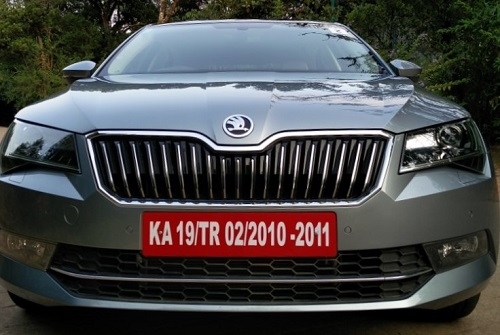

In [7]:
img=cv2.imread(sample_input)
cv2_imshow(img)

In [8]:
reader=easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [9]:
output=reader.readtext(sample_input)    #it also works on np array images
print(output)

[([[143, 215], [337, 215], [337, 253], [143, 253]], 'KA 197R 0212010*2011 ', 0.1805763326781485)]


In [10]:
cordinates=output[0][0]
print(cordinates)
cordlist=list(zip(*cordinates))
print(cordlist)
print(f"\nmin-x:{min(cordlist[0])}\nmax-x:{max(cordlist[0])}\nmin-y:{min(cordlist[1])}\nmax-y:{max(cordlist[1])}")

[[143, 215], [337, 215], [337, 253], [143, 253]]
[(143, 337, 337, 143), (215, 215, 253, 253)]

min-x:143
max-x:337
min-y:215
max-y:253


In [11]:
text=output[0][1]
text2=name_info
print(text,text2)

KA 197R 0212010*2011  KA19TR02


In [19]:
# x_min,y_min=[int(min(idx)) for idx in zip(*cordinates)]
# x_max,y_max=[int(max(idx)) for idx in zip(*cordinates)]
# print(x_min,y_min,x_max,y_max)

x_mint,y_mint,x_maxt,y_maxt=xmin,ymin,xmax,ymax
print(x_mint,y_mint,x_maxt,y_maxt)

140 210 339 260


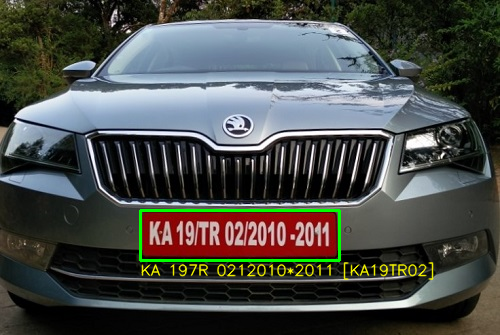

In [20]:
img=cv2.imread(sample_input)
img=cv2.putText(img,text=(text+f"[{text2}]"),org=(x_mint,y_maxt+15),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.5,color=(0,255,255),thickness=1,lineType=cv2.LINE_AA)
img=cv2.rectangle(img,(x_mint,y_mint),(x_maxt,y_maxt),(0,255,0),2)
cv2_imshow(img)

In [15]:
cv2.imwrite(output_folder+os.path.basename(sample_input),img)

True

In [25]:
def image_test(input_path):
  idx=0;
  for path in glob.glob(input_path):

    basename=os.path.basename(path)
    print(idx,basename)

    xml_path=path[0:-3]+"xml"
    info = xet.parse(xml_path)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')

    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)
    name_info=member_object.find('name').text

    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    metadata=reader.readtext(gray)

    # cordinates=metadata[0][0]
    # x_min,y_min=[int(min(idx)) for idx in zip(*cordinates)]
    # x_max,y_max=[int(max(idx)) for idx in zip(*cordinates)]
    x_min,x_max,y_min,y_max=xmin,xmax,ymin,ymax

    text=metadata[0][1]
    img=cv2.putText(img,text=(text+f"[{name_info}]"),org=(x_min,y_max+15),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.5,color=(0,255,255),thickness=1,lineType=cv2.LINE_AA)
    img=cv2.rectangle(img,(x_min,y_min),(x_max,y_max),(0,255,0),2)

    cv2.imwrite(output_folder+basename,img)
    if(idx==5):break
    idx+=1

In [26]:
image_test(input_image_folder)

0 18d2b870-7817-46da-a59a-6406c1b472c9___1033.png
1 2424211e-e6ba-4478-8ed1-6a04e25499c7___main-qimg-7673aeac86d0ef987deb837552c5dd4c-1.png
2 346a6946-ae0a-4b3f-b094-d971124b2064___banner_3.png
3 8e0b8c6f-850f-4918-983a-7fa110368d32___banner_4.png
4 aff1f53b-3259-44f0-9718-05fb64dc8ba1___Untitled.png
5 car-wbs-CH01AN0001_00000.png
